# Calculating square roots

How do calculators compute square root? You probably already know how addition is done, digit by digit with carryover. Subtraction is done in a similar way. Multiplication can be thought of as repeated addition. And division is the opposite of multiplication. But, how are square roots computed? One way to do it is to use an iterative algorithm called the Newton's method. 

Problem: You are given a number N (say 9 or 45 or 12345) and asked what its square root $\sqrt{N}$ is. What does this mean? It means that you have to find a number $x$ such that $x^2 = N$. 

### Thinking geometrically 
You know that the area of a square of side $a$ is $a^2$. So another way to imagine the square root problem is to think of a square with area N and asking what its side length should be?

### Thinking algebraically
If you plot a function $f(x) = x^2 - N$, for the point(s) at which f(x) = 0,the value of $x^2$ will be equal to $N$. How do we find such points?

### The Newton's method
Newton's method is an iterative algorithm to find the roots of algebraic equations (such as $x^2 - N = 0$). We start with an initial guess, that is ideally close to the solution. Then we find increasingly accurate estimations using the formula,

\begin{align}
x_{i+1} = x_{i} - \frac{x_i^2 - N}{2x_{i}}.
\end{align}

We use the initial guess $x_0$ to find the next estimate $x_1$. $x_1$ will be a more accurate estimate than $x_0$. We then use $x_1$ to find $x_2$, then $x_2$ to find $x_3$ and so on until we get sufficiently accurate estimate for $\sqrt{N}$.

In [6]:
# Newtons method to compute square root of 'N'
# x0 is the initial guess
# max_steps is the maximum number of steps in iteration

N = 9
x0 = 1
max_steps = 5
print(f"Computing square root of {N}:")

xi = x0
step = 0
print(f"Initial guess is {x0}")
while step < max_steps:
    xj = xi - (xi**2 - N) / (2*xi)
    xi = xj
    step += 1
    print(f"Estimate after step {step} is {xi}")

Computing square root of 9:
Initial guess is 1
Estimate after step 1 is 5.0
Estimate after step 2 is 3.4
Estimate after step 3 is 3.023529411764706
Estimate after step 4 is 3.00009155413138
Estimate after step 5 is 3.000000001396984


### Visualizing the estimates

The function $f(x) = x^2 - N$ is a parabola. In the next plot we see how subsequent guesses gets more and more closer to the point where $f(x) = 0$. In other words, the estimates becomes more accurate with each step of iteration.

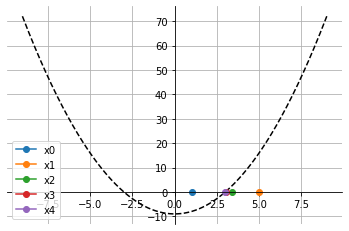

In [43]:
import numpy as np
import matplotlib.pyplot as plt

N = 9
x0 = 1
max_steps = 4

xvals = np.linspace(-N, N, 1000)
yvals = xvals**2 - N

fig, ax = plt.subplots()

ax.grid()
ax.plot(xvals, yvals, color='k', linestyle='--')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

xi = x0
step = 0
ax.plot(x0,0, marker='o', label=f'x0')
while step < max_steps:
    xj = xi - (xi**2 - N) / (2*xi)
    xi = xj
    step += 1
    ax.plot(xi,0, marker='o', label=f'x{step}')
    
ax.legend()

### The movement along tangent
Each step in the Newton Raphson iteration correspond to motion along the local tangent. The next guess is the point of intersection between the local tangent of the current guess and the x-axis.

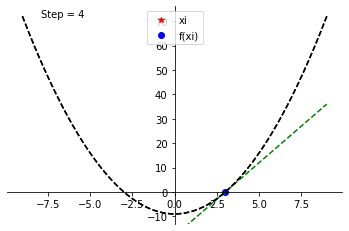

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

N = 9
x0 = 1
max_steps = 4

xvals = np.linspace(-N, N, 1000)
yvals = xvals**2 - N

xi = x0
step = 0
guess_x = np.zeros(max_steps+1)
guess_y = np.zeros(max_steps+1)
guess_x[0] = x0
guess_y[0] = x0**2 - N
while step < max_steps:
    xj = xi - (xi**2 - N) / (2*xi)
    xi = xj
    step += 1
    guess_x[step] = xi
    guess_y[step] = xi**2 - N

    
fig, ax = plt.subplots()

slope_xdata = np.zeros(100)
slope_ydata = np.zeros(100)
curr_guess, = ax.plot([], [], 'r*', label='xi')
f_at_curr_guess, = ax.plot([], [], 'bo', label='f(xi)')
tangent_line, = ax.plot([], [], 'g--')
step_text = ax.text(0.1, 0.95, '', transform=ax.transAxes)

def init():
    ax.grid()
    ax.plot(xvals, yvals, color='k', linestyle='--')
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    # remove the ticks from the top and right edges
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.legend(loc='upper center')
    return tangent_line,

def update(frame):
    curr_guess.set_label(f'x{step}')
    curr_guess.set_data(guess_x[frame], 0)
    f_at_curr_guess.set_data(guess_x[frame], guess_y[frame])
    slope_xdata = np.linspace(-N,N,100)
    slope_ydata = guess_y[frame] + 2*guess_x[frame]*(slope_xdata - guess_x[frame])
    tangent_line.set_data(slope_xdata, slope_ydata)
    step_text.set_text(f'Step = {frame}')
    return tangent_line, 

ani = FuncAnimation(fig, update, frames=range(max_steps+1), interval=2000,
                    init_func=init, blit=True)

HTML(ani.to_jshtml())